In [1]:
from MyTradingLib import *
import time
import pandas as pd
import json

/Users/carlosarocha/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
###############################################################################
# Lets check Alpha Vantage API functions
###############################################################################

In [13]:
df, fp = get_Intraday2m('AAPL', '5min')
df

,timestamp,open,high,low,close,volume
0,2021-12-10 20:00:00,179.83,179.85,179.78,179.84,14335
1,2021-12-10 19:55:00,179.80,179.85,179.79,179.83,9597
2,2021-12-10 19:50:00,179.80,179.82,179.71,179.75,9877
3,2021-12-10 19:45:00,179.76,179.85,179.75,179.77,13476
4,2021-12-10 19:40:00,179.84,179.85,179.77,179.77,8557
...,...,...,...,...,...,...
3522,2021-11-15 04:25:00,150.05,150.10,150.05,150.10,842
3523,2021-11-15 04:20:00,150.14,150.15,150.14,150.15,1186
3524,2021-11-15 04:15:00,150.27,150.31,150.27,150.29,1474
3525,2021-11-15 04:10:00,150.37,150.37,150.25,150.27,12462


<AxesSubplot:xlabel='timestamp'>

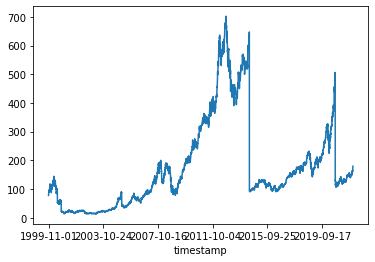

In [17]:
df, fp = get_DailyRaw('AAPL', outputsize='full')
df.sort_values(by='timestamp', inplace=True)
df.index = df['timestamp']
df['close'].plot()

             timestamp     open      high     low   close  adjusted_close  \
timestamp                                                                   
1999-11-01  1999-11-01   80.000   80.6900   77.37   77.62        0.594112   
1999-11-02  1999-11-02   78.000   81.6900   77.31   80.25        0.614243   
1999-11-03  1999-11-03   81.620   83.2500   81.00   81.50        0.623810   
1999-11-04  1999-11-04   82.060   85.3700   80.62   83.62        0.640037   
1999-11-05  1999-11-05   84.620   88.3700   84.00   88.31        0.675935   
...                ...      ...       ...     ...     ...             ...   
2021-12-06  2021-12-06  164.290  167.8799  164.28  165.32      165.320000   
2021-12-07  2021-12-07  169.080  171.5800  168.34  171.18      171.180000   
2021-12-08  2021-12-08  172.125  175.9600  170.70  175.08      175.080000   
2021-12-09  2021-12-09  174.910  176.7500  173.92  174.56      174.560000   
2021-12-10  2021-12-10  175.205  179.6300  174.69  179.45      179.450000   

<AxesSubplot:xlabel='timestamp'>

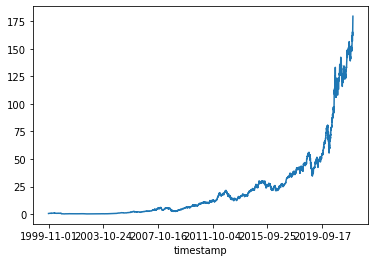

In [20]:
df, fp = get_DailyAdjusted('AAPL', outputsize='full')
df.sort_values(by='timestamp', inplace=True)
df.index = df['timestamp']
print(df)
df['adjusted_close'].plot()

In [22]:
df, fp = get_WeeklyAdjusted('AAPL')
df.sort_values(by='timestamp', inplace=True)
df.index = df['timestamp']
df

,timestamp,open,high,low,close,adjusted close,volume,dividend amount
timestamp,,,,,,,,
1999-11-12,1999-11-12,87.75,97.73,86.75,90.62,0.6936,25776200,0.0
1999-11-19,1999-11-19,89.62,94.75,88.06,92.44,0.7075,13711000,0.0
1999-11-26,1999-11-26,91.75,95.50,88.50,95.06,0.7276,9757600,0.0
1999-12-03,1999-12-03,94.25,115.56,93.25,115.00,0.8802,28046300,0.0
1999-12-10,1999-12-10,114.56,118.00,99.00,103.00,0.7884,25152800,0.0
...,...,...,...,...,...,...,...,...
2021-11-12,2021-11-12,151.41,151.57,147.48,149.99,149.9900,281026556,0.0
2021-11-19,2021-11-19,150.37,161.02,149.34,160.55,160.5500,462419283,0.0
2021-11-26,2021-11-26,161.68,165.70,156.36,156.81,156.8100,359933163,0.0


In [31]:
df = get_SearchTicker('tesla')
df

,symbol,name,type,region,marketOpen,marketClose,timezone,currency,matchScore
0,TSLA,Tesla Inc,Equity,United States,09:30,16:00,UTC-04,USD,0.8889
1,TL0.DEX,Tesla Inc,Equity,XETRA,08:00,20:00,UTC+01,EUR,0.7143
2,TL0.FRK,Tesla Inc,Equity,Frankfurt,08:00,20:00,UTC+01,EUR,0.7143
3,TSLA34.SAO,Tesla Inc,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.7143


In [32]:
df, fp = get_CompanyOverview('TSLA')
df

,Symbol,AssetType,Name,Description,CIK,Exchange,Currency,Country,Sector,Industry,Address,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,BookValue,DividendPerShare,DividendYield,EPS,RevenuePerShareTTM,ProfitMargin,OperatingMarginTTM,ReturnOnAssetsTTM,ReturnOnEquityTTM,RevenueTTM,GrossProfitTTM,DilutedEPSTTM,QuarterlyEarningsGrowthYOY,QuarterlyRevenueGrowthYOY,AnalystTargetPrice,TrailingPE,ForwardPE,PriceToSalesRatioTTM,PriceToBookRatio,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
0,TSLA,Common Stock,Tesla Inc,"Tesla, Inc. is an American electric vehicle an...",1318605,NASDAQ,USD,USA,MANUFACTURING,MOTOR VEHICLES & PASSENGER CAR BODIES,"3500 DEER CREEK RD, PALO ALTO, CA, US",December,2021-09-30,1021367482000,7267000000,332.15,2.669,26.95,None,0,3.062,48.27,0.074,0.0979,0.0554,0.156,46848000000,6630000000,3.062,4.333,0.568,855.58,332.15,121.95,21.8,37.75,21.67,138.83,2.038,1243.49,539.49,1013.3,760.94,1004260000,None,None


In [37]:
df, fp = get_CompanyEarnings('AAPL')
df[0]

,fiscalDateEnding,reportedEPS
0,2021-09-30,5.62
1,2020-09-30,3.27
2,2019-09-30,2.98
3,2018-09-30,2.97
4,2017-09-30,2.3
5,2016-09-30,2.0675
6,2015-09-30,2.3
7,2014-09-30,1.6075
8,2013-09-30,1.415
9,2012-09-30,1.5775


In [38]:
df[1]

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage
0,2021-09-30,2021-10-28,1.24,1.238,0.002,0.1616
1,2021-06-30,2021-07-27,1.3,1.0143,0.2857,28.1672
2,2021-03-31,2021-04-28,1.4,0.9888,0.4112,41.5858
3,2020-12-31,2021-01-27,1.68,1.4158,0.2642,18.6608
4,2020-09-30,2020-10-29,0.73,0.6987,0.0313,4.4797
...,...,...,...,...,...,...
98,1997-03-31,1997-04-16,-0.05,-0.04,-0.01,-25
99,1996-12-31,1997-01-15,-0.03,-0.02,-0.01,-50
100,1996-09-30,1996-10-16,0.0018,-0.01,0.0118,118
101,1996-06-30,1996-07-17,-0.02,-0.04,0.02,50


In [40]:
df, fp = get_IncomeStatement('AAPL')
df[0]

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,investmentIncomeNet,netInterestIncome,interestIncome,interestExpense,nonInterestIncome,otherNonOperatingIncome,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
0,2021-09-30,USD,152836000000,363172000000,234954000000,212981000000,108949000000,21973000000,21914000000,43887000000,2843000000,-2645000000,2843000000,2645000000,365817000000,60000000,9500000000,11284000000,109207000000,14527000000,2645000000,94680000000,95249000000,111852000000,123136000000,94680000000
1,2020-09-30,USD,104956000000,271642000000,189475000000,169559000000,66288000000,19916000000,18752000000,38668000000,3763000000,-2873000000,3763000000,2873000000,274515000000,-87000000,9700000000,11056000000,67091000000,9680000000,2873000000,57411000000,57453000000,69964000000,81020000000,57411000000
2,2019-09-30,USD,98392000000,256598000000,180027000000,161782000000,63930000000,18245000000,16217000000,34462000000,4961000000,-3576000000,4961000000,3576000000,260174000000,422000000,11300000000,12547000000,65737000000,10481000000,3576000000,55256000000,58037000000,69313000000,81860000000,55256000000
3,2018-09-30,USD,101839000000,265595000000,163756000000,163756000000,70898000000,16705000000,14236000000,30941000000,5686000000,-3240000000,5686000000,3240000000,265595000000,-441000000,9300000000,10903000000,72903000000,13372000000,3240000000,59531000000,56505000000,76143000000,87046000000,59531000000
4,2017-09-30,USD,88186000000,229234000000,141048000000,141048000000,61344000000,15261000000,11581000000,26842000000,5201000000,-2323000000,5201000000,2323000000,229234000000,-133000000,8200000000,1200000000,64089000000,15738000000,2323000000,48351000000,47567000000,66412000000,67612000000,48351000000


In [41]:
df[1]

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,investmentIncomeNet,netInterestIncome,interestIncome,interestExpense,nonInterestIncome,otherNonOperatingIncome,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
0,2021-09-30,USD,35174000000,82688000000,53802000000,48186000000,23786000000,5616000000,5772000000,11388000000,659000000,-672000000,659000000,672000000,83360000000,-525000000,None,2989000000,23248000000,2697000000,672000000,20551000000,20656000000,23920000000,26909000000,20551000000
1,2021-06-30,USD,35255000000,80769000000,51591000000,46179000000,24126000000,5412000000,5717000000,11129000000,719000000,-665000000,719000000,665000000,81434000000,189000000,None,2832000000,24369000000,2625000000,665000000,21744000000,22088000000,25034000000,27866000000,21744000000
2,2021-03-31,USD,38079000000,88914000000,56819000000,51505000000,27503000000,5314000000,5262000000,10576000000,718000000,-670000000,718000000,670000000,89584000000,460000000,None,2797000000,28011000000,4381000000,670000000,23630000000,23165000000,28681000000,31478000000,23630000000
3,2020-12-31,USD,44328000000,110801000000,72742000000,67111000000,33534000000,5631000000,5163000000,10794000000,747000000,-638000000,747000000,638000000,111439000000,-64000000,None,2666000000,33579000000,4824000000,638000000,28755000000,29340000000,34217000000,36883000000,28755000000
4,2020-09-30,USD,24689000000,64698000000,44945000000,40009000000,14775000000,4936000000,4978000000,9914000000,768000000,-634000000,134000000,634000000,64698000000,-8000000,None,2702000000,14901000000,2228000000,634000000,24689000000,12817000000,15535000000,18237000000,12673000000
5,2020-06-30,USD,22680000000,58988000000,41836000000,37005000000,13091000000,4831000000,4758000000,9589000000,901000000,-697000000,901000000,697000000,59685000000,-158000000,None,2752000000,13137000000,1884000000,697000000,11253000000,13492000000,13834000000,16586000000,11253000000
6,2020-03-31,USD,22370000000,57556000000,40895000000,35943000000,12853000000,4952000000,4565000000,9517000000,1049000000,-757000000,1049000000,757000000,58313000000,-10000000,None,2786000000,13135000000,1886000000,757000000,11249000000,8878000000,13892000000,16678000000,11249000000
7,2019-12-31,USD,35217000000,91034000000,61799000000,56602000000,25569000000,5197000000,4451000000,9648000000,1045000000,-785000000,1045000000,785000000,91819000000,89000000,None,2816000000,25918000000,3682000000,785000000,22236000000,22266000000,26703000000,29519000000,22236000000
8,2019-09-30,USD,24313000000,64040000000,44305000000,39727000000,15625000000,4578000000,4110000000,8688000000,1106000000,-810000000,1106000000,810000000,64040000000,206000000,None,3179000000,16127000000,2441000000,810000000,24313000000,13741000000,16937000000,20116000000,13686000000
9,2019-06-30,USD,20227000000,52943000000,38008000000,33582000000,11544000000,4426000000,4257000000,8683000000,1190000000,-866000000,1190000000,866000000,53809000000,43000000,None,2933000000,11911000000,1867000000,866000000,10044000000,10904000000,12777000000,15710000000,10044000000


In [42]:
df, fp = get_BalanceSheet('AAPL')
df[0]

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,accumulatedDepreciationAmortizationPPE,intangibleAssets,intangibleAssetsExcludingGoodwill,goodwill,investments,longTermInvestments,shortTermInvestments,otherCurrentAssets,otherNonCurrrentAssets,totalLiabilities,totalCurrentLiabilities,currentAccountsPayable,deferredRevenue,currentDebt,shortTermDebt,totalNonCurrentLiabilities,capitalLeaseObligations,longTermDebt,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
0,2021-09-30,USD,351002000000,134836000000,34940000000,62639000000,6580000000,51506000000,216166000000,39440000000,70283000000,None,None,None,318994000000,127877000000,27699000000,14111000000,48849000000,287912000000,125481000000,54763000000,19512000000,15692000000,6000000000,162431000000,769000000,134913000000,9613000000,109106000000,241783000000,47493000000,53325000000,63090000000,None,5562000000,57365000000,16426786000
1,2020-09-30,USD,323888000000,143713000000,38016000000,90943000000,4061000000,37445000000,180175000000,36766000000,66760000000,None,None,None,345644000000,100887000000,52927000000,11264000000,42522000000,258549000000,105392000000,42296000000,16843000000,13793000000,4996000000,153157000000,637000000,125873000000,8773000000,98667000000,216860000000,42684000000,54490000000,65339000000,None,14966000000,50779000000,16976763000
2,2019-09-30,USD,338516000000,162819000000,48844000000,100557000000,4106000000,45804000000,175697000000,37378000000,58579000000,None,None,None,362952000000,105341000000,51713000000,12352000000,32978000000,248028000000,105718000000,46236000000,13622000000,16240000000,5980000000,142310000000,None,117760000000,10260000000,91807000000,209135000000,37720000000,50503000000,90488000000,None,45898000000,45174000000,4443236000
3,2018-09-30,USD,365725000000,131339000000,25913000000,25913000000,3956000000,48995000000,234386000000,41304000000,49099000000,None,None,None,448287000000,170799000000,40388000000,12087000000,22283000000,258578000000,115929000000,55888000000,14766000000,20748000000,11964000000,142649000000,None,111984000000,8784000000,93735000000,220132000000,33327000000,48914000000,107147000000,None,70400000000,40201000000,4754986000
4,2017-09-30,USD,375319000000,128645000000,20289000000,74181000000,4855000000,35673000000,246674000000,33783000000,41293000000,8015000000,2298000000,5717000000,268895000000,194714000000,53892000000,13936000000,18177000000,241272000000,100814000000,44242000000,10384000000,18473000000,11977000000,140458000000,None,112596000000,6496000000,97207000000,219794000000,30551000000,40415000000,134047000000,None,98330000000,35867000000,5126201000


In [43]:
df[1]

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,accumulatedDepreciationAmortizationPPE,intangibleAssets,intangibleAssetsExcludingGoodwill,goodwill,investments,longTermInvestments,shortTermInvestments,otherCurrentAssets,otherNonCurrrentAssets,totalLiabilities,totalCurrentLiabilities,currentAccountsPayable,deferredRevenue,currentDebt,shortTermDebt,totalNonCurrentLiabilities,capitalLeaseObligations,longTermDebt,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
0,2021-09-30,USD,351002000000,134836000000,34940000000,62639000000,6580000000,51506000000,216166000000,39440000000,70283000000,None,None,None,318994000000,127877000000,27699000000,14111000000,48849000000,287912000000,125481000000,54763000000,19512000000,15692000000,6000000000,162431000000,769000000,134913000000,9613000000,109106000000,241783000000,47493000000,53325000000,63090000000,None,5562000000,57365000000,16426786000
1,2021-06-30,USD,329840000000,114423000000,34050000000,61696000000,5178000000,33908000000,215417000000,38615000000,70242000000,None,None,None,328650000000,131948000000,27646000000,13641000000,44854000000,265560000000,107754000000,40409000000,19681000000,16039000000,8000000000,157806000000,None,128339000000,8039000000,105752000000,120840000000,43625000000,52054000000,64280000000,None,9233000000,54989000000,16556942000
2,2021-03-31,USD,337158000000,121465000000,38466000000,69834000000,5219000000,33036000000,215693000000,37815000000,69465000000,None,None,None,338696000000,134539000000,31368000000,13376000000,43339000000,267980000000,106385000000,40127000000,19495000000,13003000000,5000000000,161595000000,None,129203000000,8003000000,108642000000,120629000000,45660000000,52953000000,69178000000,None,15261000000,54203000000,16686305000
3,2020-12-31,USD,354054000000,154106000000,36010000000,76826000000,4973000000,58620000000,199948000000,37933000000,67560000000,None,None,None,355132000000,118745000000,40816000000,13687000000,43270000000,287830000000,132507000000,63846000000,18995000000,12762000000,5000000000,155323000000,None,124962000000,7762000000,99281000000,110595000000,48504000000,56042000000,66224000000,None,14301000000,51744000000,16823263000
4,2020-09-30,USD,323888000000,143713000000,38016000000,90943000000,4061000000,37445000000,180175000000,36766000000,66760000000,None,None,None,345644000000,100887000000,52927000000,11264000000,42522000000,258549000000,105392000000,42296000000,16843000000,13793000000,4996000000,153157000000,637000000,125873000000,8773000000,98667000000,216860000000,42684000000,54490000000,65339000000,None,14966000000,50779000000,16976763000
5,2020-06-30,USD,317344000000,140065000000,33383000000,93025000000,3978000000,32075000000,177279000000,35687000000,65230000000,None,None,None,353851000000,100592000000,59642000000,10987000000,41000000000,245062000000,95318000000,35325000000,16113000000,18675000000,11166000000,149744000000,None,118309000000,7509000000,94048000000,110987000000,35005000000,55696000000,72282000000,None,24136000000,48696000000,4283939000
6,2020-03-31,USD,320400000000,143753000000,40174000000,94051000000,3334000000,30677000000,176647000000,35889000000,62854000000,None,None,None,345514000000,98793000000,53877000000,15691000000,41965000000,241975000000,96094000000,32421000000,15328000000,20421000000,10029000000,145881000000,None,115992000000,10392000000,89086000000,107777000000,37324000000,56795000000,78425000000,None,33182000000,48032000000,4323987000
7,2019-12-31,USD,340618000000,163231000000,39771000000,107162000000,4097000000,39946000000,177387000000,37031000000,60959000000,None,None,None,374351000000,99899000000,67391000000,12026000000,40457000000,251087000000,102161000000,45111000000,14673000000,15214

In [44]:
df, fp = get_CashFlow('AAPL')
df[0]

,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,changeInInventory,profitLoss,cashflowFromInvestment,cashflowFromFinancing,proceedsFromRepaymentsOfShortTermDebt,paymentsForRepurchaseOfCommonStock,paymentsForRepurchaseOfEquity,paymentsForRepurchaseOfPreferredStock,dividendPayout,dividendPayoutCommonStock,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome
0,2021-09-30,USD,104038000000,4087000000,None,19801000000,24712000000,11284000000,11085000000,14028000000,2642000000,94680000000,-14545000000,-93353000000,2044000000,85971000000,85971000000,None,14467000000,14467000000,None,1105000000,20393000000,None,-84866000000,None,-3860000000,None,94680000000
1,2020-09-30,USD,80674000000,4502000000,None,6935000000,1245000000,11056000000,7309000000,-8470000000,127000000,57411000000,-4289000000,-86820000000,-1926000000,72358000000,72358000000,None,14081000000,14081000000,None,880000000,16091000000,None,-71478000000,None,-10435000000,None,57411000000
2,2019-09-30,USD,69391000000,3423000000,None,-7248000000,-3760000000,12547000000,10495000000,-3176000000,289000000,55256000000,45896000000,-90976000000,-11954000000,66897000000,66897000000,None,14119000000,14119000000,None,781000000,6963000000,None,-66116000000,None,24311000000,None,55256000000
3,2018-09-30,USD,77434000000,3022000000,None,47665000000,12927000000,10903000000,13313000000,13332000000,-828000000,59531000000,16066000000,-87876000000,-74000000,72738000000,72738000000,None,13712000000,13712000000,None,669000000,6969000000,None,-72069000000,None,5624000000,None,59531000000
4,2017-09-30,USD,64225000000,2092000000,None,8838000000,14388000000,10157000000,12795000000,6347000000,2723000000,48351000000,-46446000000,-17974000000,7704000000,32900000000,32900000000,None,12769000000,12563000000,None,555000000,28662000000,None,-32345000000,None,-195000000,None,48351000000


In [45]:
df[1]

,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,changeInInventory,profitLoss,cashflowFromInvestment,cashflowFromFinancing,proceedsFromRepaymentsOfShortTermDebt,paymentsForRepurchaseOfCommonStock,paymentsForRepurchaseOfEquity,paymentsForRepurchaseOfPreferredStock,dividendPayout,dividendPayoutCommonStock,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome
0,2021-09-30,USD,20200000000,2217000000,None,19386000000,21176000000,2989000000,3223000000,17604000000,1429000000,20551000000,835000000,-20382000000,-4000000000,19748000000,19748000000,None,3640000000,3640000000,None,544000000,6470000000,None,-19204000000,None,653000000,None,20551000000
1,2021-06-30,USD,21094000000,543000000,None,-2275000000,2422000000,2832000000,2093000000,869000000,-13000000,21744000000,3572000000,-29396000000,6000000000,22900000000,22900000000,None,3767000000,3767000000,None,0,0,None,-22900000000,None,21744000000,None,21744000000
2,2021-03-31,USD,23981000000,708000000,None,-28280000000,-24501000000,2797000000,2269000000,-25584000000,276000000,23630000000,-10368000000,-11326000000,0,18548000000,18548000000,None,3447000000,3447000000,None,561000000,13923000000,None,-17987000000,None,23630000000,None,23630000000
3,2020-12-31,USD,38763000000,619000000,None,30970000000,25615000000,2666000000,3500000000,21139000000,950000000,28755000000,-8584000000,-32249000000,44000000,24775000000,24775000000,None,3613000000,3613000000,None,0,0,None,-24775000000,None,-2070000000,None,28755000000
4,2020-09-30,USD,20576000000,1127000000,None,12206000000,8329000000,2702000000,1784000000,5364000000,137000000,24689000000,5531000000,-21357000000,-7153000000,17187000000,17187000000,None,3511000000,3511000000,None,450000000,5456000000,None,-16737000000,None,24689000000,None,12673000000
5,2020-06-30,USD,16271000000,388000000,None,-474000000,-44000000,2752000000,1565000000,1373000000,689000000,11253000000,-5165000000,-19116000000,-365000000,15891000000,15891000000,None,3656000000,3656000000,None,0,8425000000,None,-15891000000,None,10865000000,None,11253000000
6,2020-03-31,USD,13311000000,353000000,None,-10207000000,-8205000000,2786000000,1853000000,-9290000000,-727000000,11249000000,9013000000,-20940000000,7550000000,18574000000,18574000000,None,3375000000,3375000000,None,428000000,0,None,-18146000000,None,10896000000,None,11249000000
7,2019-12-31,USD,30516000000,1120000000,None,5410000000,1165000000,2816000000,2107000000,-5917000000,28000000,22236000000,-13668000000,-25407000000,-1958000000,20706000000,20706000000,None,3539000000,3539000000,None,2000000,2210000000,None,-20704000000,None,-8559000000,None,22236000000
8,2019-09-30,USD,19910000000,860000000,None,22085000000,19925000000,3179000000,2777000000,19320000000,785000000,24313000000,-798000000,-21039000000,-7902000000,17444000000,17444000000,None,3479000000,3479000000,None,390000000,6963000000,None,-17054000000,None,24313000000,None,13686000000
9,2019-06-30,USD,11636000000,801000000,None,-5496000000,-2698000000,2933000000,2000000000,214000000,-1502000000,10044000000,27502000000,-26804000000,-3980000000,16955000000,16955000000,None,3629000000,3629000000,None,1000000,0,None,-16954000000,None,10044000000,None,10044000000


In [46]:
df, fp = get_ListingStatus()
df

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
0,A,Agilent Technologies Inc,NYSE,Stock,1999-11-18,NaN,Active
1,AA,Alcoa Corp,NYSE,Stock,2016-10-18,NaN,Active
2,AAA,AAF First Priority CLO Bond ETF,NYSE ARCA,ETF,2020-09-09,NaN,Active
3,AAAU,Goldman Sachs Physical Gold ETF,NYSE ARCA,ETF,2018-08-15,NaN,Active
4,AAC,Ares Acquisition Corporation - Class A,NYSE,Stock,2021-03-25,NaN,Active
...,...,...,...,...,...,...,...
12023,ZYME,Zymeworks Inc,NYSE,Stock,2017-04-28,NaN,Active
12024,ZYNE,Zynerba Pharmaceuticals Inc,NASDAQ,Stock,2015-08-05,NaN,Active
12025,ZYXI,Zynex Inc,NASDAQ,Stock,2002-12-31,NaN,Active
12026,ZZK,NaN,NYSE ARCA,Stock,2020-07-22,NaN,Active


In [49]:
df, fp = get_EarningsCalendar()
df

,symbol,name,reportDate,fiscalDateEnding,estimate,currency
0,A,Agilent Technologies Inc,2022-02-14,2022-01-31,1.17,USD
1,A,Agilent Technologies Inc,2022-05-23,2022-04-30,NaN,USD
2,A,Agilent Technologies Inc,2022-08-15,2022-07-31,NaN,USD
3,AA,Alcoa Corp,2022-01-18,2021-12-31,2.06,USD
4,AA,Alcoa Corp,2022-04-13,2022-03-31,NaN,USD
...,...,...,...,...,...,...
19038,ZYNE,Zynerba Pharmaceuticals Inc,2022-11-14,2022-09-30,NaN,USD
19039,ZYXI,Zynex Inc,2022-02-23,2021-12-31,0.19,USD
19040,ZYXI,Zynex Inc,2022-04-27,2022-03-31,NaN,USD
19041,ZYXI,Zynex Inc,2022-07-27,2022-06-30,NaN,USD


In [50]:
df, fp = get_IpoCalendar()
df

,symbol,name,ipoDate,priceRangeLow,priceRangeHigh,currency,exchange
0,NHICW,NewHold Investment Corp. II Warrant,2021-12-13,0,0,USD,NASDAQ
1,NHIC,NewHold Investment Corp. II Class A Common Stock,2021-12-13,0,0,USD,NASDAQ
2,AEAE,AltEnergy Acquisition Corp. Class A Common Stock,2021-12-13,0,0,USD,NASDAQ
3,XFIN,ExcelFin Acquisition Corp Class A Common Stock,2021-12-13,0,0,USD,NASDAQ
4,XFINW,ExcelFin Acquisition Corp Warrant,2021-12-13,0,0,USD,NASDAQ
5,AEAEW,AltEnergy Acquisition Corp. Warrant,2021-12-13,0,0,USD,NASDAQ
6,ESACW,ESGEN Acquisition Corporation Warrants,2021-12-13,0,0,USD,NASDAQ
7,ESAC,ESGEN Acquisition Corporation Class A Ordinary...,2021-12-13,0,0,USD,NASDAQ
8,IOT,Samsara Inc.,2021-12-15,20,23,USD,NYSE
9,SIDU,Sidus Space Inc.,2021-12-16,4,6,USD,NASDAQ


In [2]:
##############################################################################
# Taking the SP500 list from Wikipedia

table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500 = table[0]
filepath = get_Filepath('SP500', 'csv')
sp500.to_csv(filepath)
sp500

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [3]:
sp500_tickers = sp500['Symbol']
sp500_tickers

0       MMM
1       ABT
2      ABBV
3      ABMD
4       ACN
       ... 
500     YUM
501    ZBRA
502     ZBH
503    ZION
504     ZTS
Name: Symbol, Length: 505, dtype: object

In [4]:
sp500['GICS Sub-Industry'].value_counts()

Health Care Equipment            19
Application Software             14
Semiconductors                   14
Electric Utilities               13
Industrial Machinery             13
                                 ..
Hotel & Resort REITs              1
Technology Distributors           1
Real Estate Services              1
Computer & Electronics Retail     1
Housewares & Specialties          1
Name: GICS Sub-Industry, Length: 124, dtype: int64

In [5]:
subInd = sp500['GICS Sub-Industry'].unique()
subInd

array(['Industrial Conglomerates', 'Health Care Equipment',
       'Pharmaceuticals', 'IT Consulting & Other Services',
       'Interactive Home Entertainment', 'Application Software',
       'Semiconductors', 'Automotive Retail',
       'Independent Power Producers & Energy Traders',
       'Life & Health Insurance', 'Industrial Gases',
       'Internet Services & Infrastructure', 'Airlines',
       'Specialty Chemicals', 'Office REITs', 'Health Care Supplies',
       'Building Products', 'Electric Utilities',
       'Property & Casualty Insurance', 'Interactive Media & Services',
       'Tobacco', 'Internet & Direct Marketing Retail', 'Paper Packaging',
       'Multi-Utilities', 'Consumer Finance', 'Specialized REITs',
       'Water Utilities', 'Asset Management & Custody Banks',
       'Health Care Distributors', 'Electrical Components & Equipment',
       'Biotechnology', 'Electronic Components', 'Managed Health Care',
       'Insurance Brokers', 'Oil & Gas Exploration & Production

In [6]:
len(subInd)

124

In [7]:
allComp = {}
for sub in subInd[:5]:
    group = sp500[sp500['GICS Sub-Industry'] == sub]['Symbol']
    print(sub + ' companies:' + str(len(group)))
    for ticker in group:
        try:
            allComp[ticker], fp = get_CompanyOverview(ticker)
            print(ticker)
        except:
            filepath = get_Filepath('SP500_CompaniesOverview', 'csv')
            df_all = pd.concat(allComp)
            df_all.to_csv(filepath, index=True)
            break
        time.sleep(15)
df_all
            
            

Industrial Conglomerates companies:4
MMM
GE
HON
ROP
Health Care Equipment companies:19
ABT
ABMD


KeyboardInterrupt: 

In [ ]:
df_all = pd.concat(allComp)

In [ ]:
df_all

In [73]:
for sub in subInd[5:]:
    group = sp500[sp500['GICS Sub-Industry'] == sub]['Symbol']
    print(sub + ' companies:' + str(len(group)))
    for ticker in group:
        try:
            allComp[ticker], fp = get_CompanyOverview(ticker)
            print(ticker)
        except:
            break
        time.sleep(15)
        
filepath = get_Filepath('SP500_CompaniesOverview', 'csv')
df_all = pd.concat(allComp)
df_all.to_csv(filepath, index=True)

Application Software companies:14
ADBE
ANSS
ADSK
CDNS
CDAY
CTXS
INTU
NLOK
ORCL
PAYC
PTC
CRM
SNPS
TYL
Semiconductors companies:14
AMD
ADI
AVGO
INTC
MCHP
MU
MPWR
NVDA
NXPI
QRVO
QCOM
SWKS
TXN
XLNX
Automotive Retail companies:1
AAP
Independent Power Producers & Energy Traders companies:2
AES
NRG
Life & Health Insurance companies:5
AFL
GL
MET
PFG
PRU
Industrial Gases companies:2
APD
LIN
Internet Services & Infrastructure companies:2
AKAM
VRSN
Airlines companies:5
ALK
AAL
DAL
LUV
UAL
Specialty Chemicals companies:8
ALB
CE
DD
ECL
IFF
LYB
PPG
SHW
Office REITs companies:3
ARE
BXP
VNO
Health Care Supplies companies:4
ALGN
COO
XRAY
WST
Building Products companies:8
ALLE
AOS
CARR
FAST
FBHS
JCI
MAS
TT
Electric Utilities companies:13
LNT
AEP
ED
D
DUK
EIX
ETR
EVRG
FE
PPL
PEG
SO
WEC
Property & Casualty Insurance companies:8
ALL
AIG
CB
CINF
HIG
PGR
TRV
WRB
Interactive Media & Services companies:5
GOOGL
GOOG
MTCH
FB
TWTR
Tobacco companies:2
MO
PM
Internet & Direct Marketing Retail companies:5
AMZN
BKNG


In [ ]:
df_all = df_all.reset_index(drop=True)

In [ ]:
df_all.dropna(inplace=True)

In [ ]:
df_all.info()

In [4]:
def stock_2years_data(stock_list):
    years = ['1']#,'2']
    months = ['1','2','3','4','5','6']#,'7','8','9','10','11','12']
    for stock in stock_list:
        df_temp = {}
        for year in years:
            for month in months:
                slice = 'year'+year+'month'+month
                print(slice)
                df_temp[year+month], filepath = get_Intraday24m(stock, '1min', slice)
                time.sleep(13)

        df = pd.concat(df_temp, ignore_index=True)
        df.index = df['time']
        df.drop(columns='time', inplace=True)
        df.to_csv('/'.join(filepath.split('/')[:-1])+'/'+stock+'_2Years_1min.csv', header=True)
        print(stock + ' = done!')

In [ ]:
tickers_downloaded = ['TSLA', 'AAPL', 'FB', 'DIS', 'HD', 'MSFT']
sp500_tickers = set(df_all['Symbol'])
sp500_tickers.difference_update(set(tickers_downloaded))
len(sp500_tickers)

In [ ]:
stock_2years_data(list(sp500_tickers)[42:66])

year1month1
year1month2
year1month3
year1month4
year1month5
year1month6
year1month7
year1month8
year1month9
year1month10
year1month11
year1month12
year2month1
year2month2
year2month3
year2month4
year2month5
year2month6
year2month7
year2month8
year2month9
year2month10
year2month11
year2month12
WHR = done!
year1month1
year1month2
year1month3
year1month4
year1month5
year1month6
year1month7
year1month8
year1month9
year1month10
year1month11
year1month12
year2month1
year2month2
year2month3
year2month4
year2month5
year2month6
year2month7
year2month8
year2month9
year2month10
year2month11
year2month12
WHR = done!
year1month1
year1month2
year1month3
year1month4
year1month5
year1month6
year1month7
year1month8
year1month9


In [ ]:
list(sp500_tickers)[43]

In [3]:
#####################################
# Continuing downloading data
#####################################
filepath = get_Filepath('sp500/SP500_CompaniesOverview', 'csv') 
df_all = pd.read_csv(filepath)
df_all.dropna(inplace=True)
df_all.drop(columns=['Unnamed: 0', 'Unnamed: 1'], inplace=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 503
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Symbol                      502 non-null    object 
 1   AssetType                   502 non-null    object 
 2   Name                        502 non-null    object 
 3   Description                 502 non-null    object 
 4   CIK                         502 non-null    float64
 5   Exchange                    502 non-null    object 
 6   Currency                    502 non-null    object 
 7   Country                     502 non-null    object 
 8   Sector                      502 non-null    object 
 9   Industry                    502 non-null    object 
 10  Address                     502 non-null    object 
 11  FiscalYearEnd               502 non-null    object 
 12  LatestQuarter               502 non-null    object 
 13  MarketCapitalization        502 non

In [4]:
sp500_tickers = list(df_all.sort_values(by='MarketCapitalization', ascending=False)['Symbol'])
#sp500_tickers

In [5]:
def stock_19month_data(stock_list):
    years = ['1']
    months = ['9']
    for stock in stock_list:
        df_temp = {}
        for year in years:
            for month in months:
                slice = 'year'+year+'month'+month
                print(slice)
                df_temp[year+month], filepath = get_Intraday24m(stock, '1min', slice)
                time.sleep(13)

        df = pd.concat(df_temp, ignore_index=True)
        df.index = df['time']
        df.drop(columns='time', inplace=True)
        df.to_csv('/'.join(filepath.split('/')[:-1])+'/'+stock+'_19month_1min.csv', header=True)
        print(stock + ' = done!')

In [7]:
stock_19month_data(sp500_tickers[309:])

year1month9
HRL = done!
year1month9
MAA = done!
year1month9
LUV = done!
year1month9
DOV = done!
year1month9
NTRS = done!
year1month9
HES = done!
year1month9
DAL = done!
year1month9
IR = done!
year1month9
KMX = done!
year1month9
MKC = done!
year1month9
CHD = done!
year1month9
PKI = done!
year1month9
DRE = done!
year1month9
MPWR = done!
year1month9
HIG = done!
year1month9
STX = done!
year1month9
STE = done!
year1month9
POOL = done!
year1month9
DTE = done!
year1month9
ESS = done!
year1month9
CCL = done!
year1month9
AEE = done!
year1month9
BIO = done!
year1month9
EXPD = done!
year1month9
XYL = done!
year1month9
BKR = done!
year1month9
HBAN = done!
year1month9
GNRC = done!
year1month9
CERN = done!
year1month9
ULTA = done!
year1month9
TRMB = done!
year1month9
ETR = done!
year1month9
FE = done!
year1month9
PPL = done!
year1month9
KEY = done!
year1month9
HAL = done!
year1month9
K = done!
year1month9
RF = done!
year1month9
TYL = done!
year1month9
CTLT = done!
year1month9
JBHT = done!
year1month

In [6]:
for n, tick in enumerate(sp500_tickers):
    if tick == 'BBY':
        print(n)

308
